In [128]:
import pandas as pd

df_train = pd.read_csv('emails.csv')
df_train2 = pd.read_csv('spam_ham_dataset.csv')

df_train = pd.concat([df_train, df_train2])

In [129]:
df_train['text'] = [i[9:] for i in df_train['text'].values]

In [142]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

corpus = df_train.text.values

vectorizer2 = TfidfVectorizer( analyzer='word',ngram_range=(1, 2), stop_words='english', max_features=10000)
Vec2 = vectorizer2.fit_transform(corpus)

In [131]:
import pickle
pickle.dump(vectorizer2, open("tfidf.pkl", 'wb'))

In [132]:
tfidf_vect_df = pd.DataFrame(Vec2.todense(), columns=vectorizer2.get_feature_names())

In [133]:
final_df = tfidf_vect_df

In [134]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
 
X, Y = final_df.values, df_train["spam"].values

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [136]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
 
 
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for training, testing in kfold.split(X_train):
    x_train, x_test = X_train[training], X_train[testing]
    y_train, y_test = Y_train[training], Y_train[testing]
    
 
    model = LGBMClassifier( n_estimators=17)
    #model = CatBoostClassifier(random_state=27,  n_estimators=20, max_depth=4)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))



0.9524082568807339
0.9524082568807339
0.9529816513761468
0.9650229357798165
0.9558232931726908
Average:  0.9557288788180245


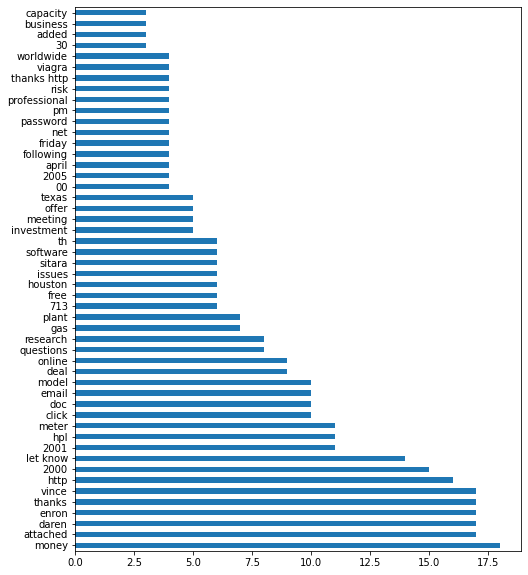

In [137]:
feat_imp = pd.Series(model.feature_importances_, index=final_df.columns)
feat_imp.nlargest(50).plot(kind='barh', figsize=(8,10))

In [138]:
import pickle
pickle.dump(final_df.columns, open("final_df.columns.pkl", 'wb'))

In [140]:
model = LGBMClassifier( n_estimators=17)
model.fit(X_train, Y_train)
preds = model.predict(X_test)
score = accuracy_score(Y_test, preds)
print(score)

0.9522935779816514


In [141]:
import pickle
pickle.dump(model, open("spam_model.pkl", 'wb'))